# Load Dataset

In [1]:
import pandas as pd
df=pd.read_csv('train.csv')
df=df[:100]

In [2]:
df.shape

(100, 2)

# Data Visualization

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df['sentiment'].value_counts()

negative    58
positive    42
Name: sentiment, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

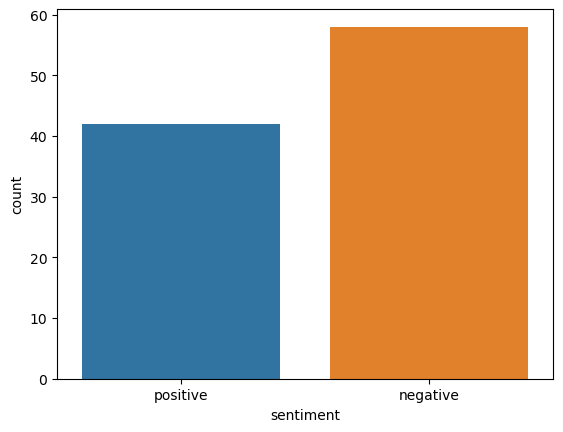

In [5]:
import seaborn as sns
sns.countplot(x='sentiment',data=df)

In [6]:
positive_review=list(df[df['sentiment']=='positive']['review'])
negative_review=list(df[df['sentiment']=='negative']['review'])

In [7]:
from wordcloud import WordCloud,STOPWORDS
from matplotlib import pyplot as plt 

In [8]:
def create_cloud(string, title=None):
    cloud = WordCloud(height=1080, 
                      width=1920, 
                      background_color='white', 
                      min_font_size=10, 
                      stopwords=STOPWORDS).generate(string)
    plt.figure(figsize=(10,20))
    plt.imshow(cloud, interpolation="bilinear")
    plt.axis("off")
    if title:
        plt.title(title, fontdict={'fontsize':24})
    plt.show()

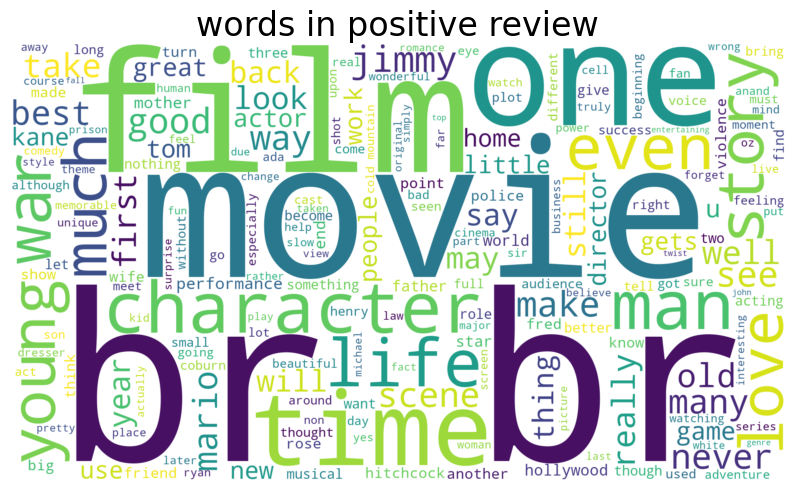

In [9]:
create_cloud(' '.join(positive_review).lower(),'words in positive review')

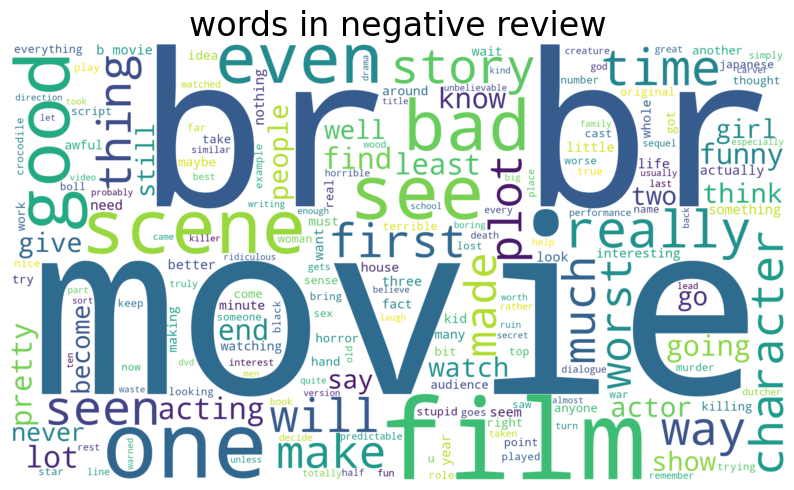

In [10]:
create_cloud(' '.join(negative_review).lower(),'words in negative review')

# Data Cleaning

In [11]:
def text_processing(data,review):
    digit = '1234567890'
    from bs4 import BeautifulSoup
    import re
    def decontracted(phrase):
        # specific
        phrase= re.sub(r'<br /><br />',' ',phrase)
        phrase = re.sub(r"won't", "will not", phrase)
        phrase = re.sub(r"can\'t", "can not", phrase)

        # general
        phrase = re.sub(r"n\'t", " not", phrase)
        phrase = re.sub(r"\'re", " are", phrase)
        phrase = re.sub(r"\'s", " is", phrase)
        phrase = re.sub(r"\'d", " would", phrase)
        phrase = re.sub(r"\'ll", " will", phrase)
        phrase = re.sub(r"\'t", " not", phrase)
        phrase = re.sub(r"\'ve", " have", phrase)
        phrase = re.sub(r"\'m", " am", phrase)
        phrase = re.sub(r'"', " ", phrase)
        return phrase
    stopwords=set(STOPWORDS)

    # Combining all the above stundents 
    from tqdm import tqdm
    preprocessed_reviews = []
    # tqdm is for printing the status bar
    for sentance in tqdm(data[review].values):
        sentance = re.sub(r"http\S+", "", sentance)
        sentance = BeautifulSoup(sentance, 'lxml').get_text()
        sentance = decontracted(sentance)
        sentance = re.sub("\S*\d\S*", "", sentance).strip()
        sentance = sentance.lower()
        # https://gist.github.com/sebleier/554280
        sentance = ' '.join(e.lower() for e in sentance.split() if e not in stopwords )
        preprocessed_reviews.append(sentance.strip())
    
    new_preprocessed_reviews=[]
    for sentennce in preprocessed_reviews:
        for char in sentennce:
            if char in digit:
                sentennce = sentennce.replace(char,'')
        new_preprocessed_reviews.append(sentennce)
        
                
    
    
    from nltk.stem import PorterStemmer

    porter = PorterStemmer()
    list2=[]
    for  sentence in new_preprocessed_reviews:
      list1=[]
      for words in sentence.split():
            list1.append(porter.stem(words))

      list2.append(' '.join(list1))
    return(list2)

In [12]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [13]:
df['cleaned_review']=text_processing(df,'review')

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1226.34it/s]


In [14]:
df.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod will hooked...
1,A wonderful little production. <br /><br />The...,positive,wonder littl production. film techniqu unassum...
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,basic famili littl boy (jake) think zombi clos...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...


In [15]:
df_x=df['cleaned_review']
df_y=df['sentiment']

# Data Splitting

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_x[:1000], df_y[:1000], test_size=0.2, random_state=0)

# train_test_split()

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80,), (20,), (80,), (20,))

In [18]:
y_train.value_counts()

negative    50
positive    30
Name: sentiment, dtype: int64

In [19]:
X_train

43    heard good thing state grace came open mind. t...
62    let begin!)))th movi origin cronenberg movi us...
3     basic famili littl boy (jake) think zombi clos...
71    honestli - short film sucks. dummi use necro s...
45    disclaimer, seen movi time last years, saw mus...
                            ...                        
96    guess origin go least two parts, thu least qua...
67    realli salman kahn realli disappoint seen movi...
64    unmarri woman name stella (bett midler) get pr...
47    film classifi drama, idea. john voight mari st...
44    movi struck home me. rememb father work factor...
Name: cleaned_review, Length: 80, dtype: object

# Data Processing

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 10,ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [21]:
X_train_tfidf.shape,X_test_tfidf.shape

((80, 10), (20, 10))

In [22]:
X_test_tfidf.toarray()[0].shape

(10,)

In [23]:
list(X_test_tfidf.toarray()[0])

[0.0,
 0.47678928020220646,
 0.22057167868115987,
 0.0,
 0.11745883851588,
 0.780581922788132,
 0.0,
 0.1961299460490312,
 0.22057167868115987,
 0.11745883851588]

# Machine Learning Algorithm - KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

list_train_acc=[]
list_test_acc = []
for i in range(10,30):
    print('n neighbor',i)
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train_tfidf, y_train)

    from sklearn.metrics import accuracy_score
    y_train_pred  = neigh.predict(X_train_tfidf)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print('train accuracy',train_accuracy)
    list_train_acc.append(train_accuracy)

    y_test_pred  = neigh.predict(X_test_tfidf)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print('test accuracy',test_accuracy)
    list_test_acc.append(test_accuracy)
    print('-'*50)
    print()

n neighbor 10
train accuracy 0.625
test accuracy 0.45
--------------------------------------------------

n neighbor 11
train accuracy 0.6875
test accuracy 0.4
--------------------------------------------------

n neighbor 12
train accuracy 0.6375
test accuracy 0.45
--------------------------------------------------

n neighbor 13
train accuracy 0.6625
test accuracy 0.45
--------------------------------------------------

n neighbor 14
train accuracy 0.6375
test accuracy 0.45
--------------------------------------------------

n neighbor 15
train accuracy 0.6625
test accuracy 0.45
--------------------------------------------------

n neighbor 16
train accuracy 0.6125
test accuracy 0.45
--------------------------------------------------

n neighbor 17
train accuracy 0.625
test accuracy 0.45
--------------------------------------------------

n neighbor 18
train accuracy 0.6125
test accuracy 0.45
--------------------------------------------------

n neighbor 19
train accuracy 0.6125
test

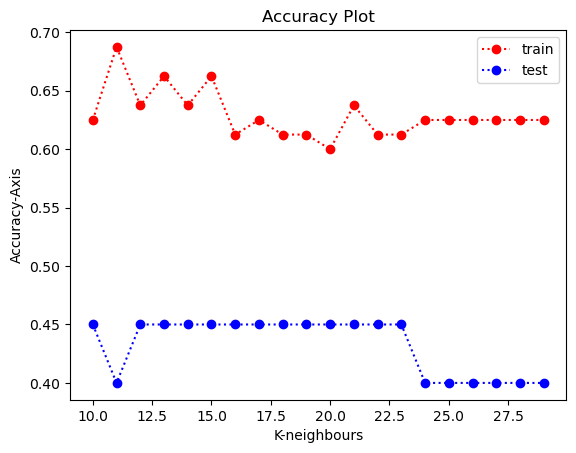

In [25]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline


#plotting the datapoints
plt.plot(list(range(10,30)),list_train_acc, color = 'r',linestyle = ":",marker = 'o')
plt.plot(list(range(10,30)),list_test_acc, color = 'b',linestyle = ":",marker = 'o')
plt.title("Accuracy Plot")
plt.ylabel("Accuracy-Axis")
plt.xlabel("K-neighbours")
plt.legend(['train','test'],loc='upper right')
plt.show()

# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

list1=[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for i in list1:
    print('alpha =' +str(i))
    bayes=LogisticRegression(penalty='l2',C=i,n_jobs=-1)
    bayes.fit(X_train_tfidf.toarray(),y_train)
    
    y_pred_train=bayes.predict(X_train_tfidf.toarray())
    y_pred_test=bayes.predict(X_test_tfidf.toarray())
    
    acc_train=accuracy_score(y_train,y_pred_train)
    print('accuracy of training data',acc_train)
    acc_test=accuracy_score(y_test,y_pred_test)
    print('accuracy of testing data',acc_train)
    
    
    print('-'*50)
    print('-'*50)
    
    

alpha =0.0001
accuracy of training data 0.625
accuracy of testing data 0.625
--------------------------------------------------
--------------------------------------------------
alpha =0.001
accuracy of training data 0.625
accuracy of testing data 0.625
--------------------------------------------------
--------------------------------------------------
alpha =0.01
accuracy of training data 0.625
accuracy of testing data 0.625
--------------------------------------------------
--------------------------------------------------
alpha =0.1
accuracy of training data 0.625
accuracy of testing data 0.625
--------------------------------------------------
--------------------------------------------------
alpha =1
accuracy of training data 0.675
accuracy of testing data 0.675
--------------------------------------------------
--------------------------------------------------
alpha =10
accuracy of training data 0.6625
accuracy of testing data 0.6625
-----------------------------------------

# Naive bayes

In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

alpha=[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for i in alpha:
    print('alpha =' +str(i))
    bayes=GaussianNB(var_smoothing=i)
    bayes.fit(X_train_tfidf.toarray(),y_train)
    
    y_pred_train=bayes.predict(X_train_tfidf.toarray())
    y_pred_test=bayes.predict(X_test_tfidf.toarray())
    
    acc_train=accuracy_score(y_train,y_pred_train)
    print('accuracy of training data',acc_train)
    acc_test=accuracy_score(y_test,y_pred_test)
    print('accuracy of testing data',acc_train)
    
    
    print('-'*50)
    print('-'*50)

alpha =0.0001
accuracy of training data 0.75
accuracy of testing data 0.75
--------------------------------------------------
--------------------------------------------------
alpha =0.001
accuracy of training data 0.75
accuracy of testing data 0.75
--------------------------------------------------
--------------------------------------------------
alpha =0.01
accuracy of training data 0.7375
accuracy of testing data 0.7375
--------------------------------------------------
--------------------------------------------------
alpha =0.1
accuracy of training data 0.75
accuracy of testing data 0.75
--------------------------------------------------
--------------------------------------------------
alpha =1
accuracy of training data 0.6375
accuracy of testing data 0.6375
--------------------------------------------------
--------------------------------------------------
alpha =10
accuracy of training data 0.625
accuracy of testing data 0.625
---------------------------------------------

# SVM

In [49]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

alpha=[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for i in alpha:
    print('alpha =' +str(i))
    bayes=make_pipeline(StandardScaler(), SVC(C=1/i, kernel='rbf', degree=3))
    bayes.fit(X_train_tfidf.toarray(),y_train)
    
    y_pred_train=bayes.predict(X_train_tfidf.toarray())
    y_pred_test=bayes.predict(X_test_tfidf.toarray())
    
    acc_train=accuracy_score(y_train,y_pred_train)
    print('accuracy of training data',acc_train)
    acc_test=accuracy_score(y_test,y_pred_test)
    print('accuracy of testing data',acc_train)
    
    
    print('-'*50)
    print('-'*50)

alpha =0.0001
accuracy of training data 1.0
accuracy of testing data 1.0
--------------------------------------------------
--------------------------------------------------
alpha =0.001
accuracy of training data 1.0
accuracy of testing data 1.0
--------------------------------------------------
--------------------------------------------------
alpha =0.01
accuracy of training data 1.0
accuracy of testing data 1.0
--------------------------------------------------
--------------------------------------------------
alpha =0.1
accuracy of training data 1.0
accuracy of testing data 1.0
--------------------------------------------------
--------------------------------------------------
alpha =1
accuracy of training data 0.8125
accuracy of testing data 0.8125
--------------------------------------------------
--------------------------------------------------
alpha =10
accuracy of training data 0.625
accuracy of testing data 0.625
--------------------------------------------------
------

              precision    recall  f1-score   support

    negative       0.40      1.00      0.57         8
    positive       0.00      0.00      0.00        12

    accuracy                           0.40        20
   macro avg       0.20      0.50      0.29        20
weighted avg       0.16      0.40      0.23        20



C:\Users\sadia\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sadia\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sadia\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


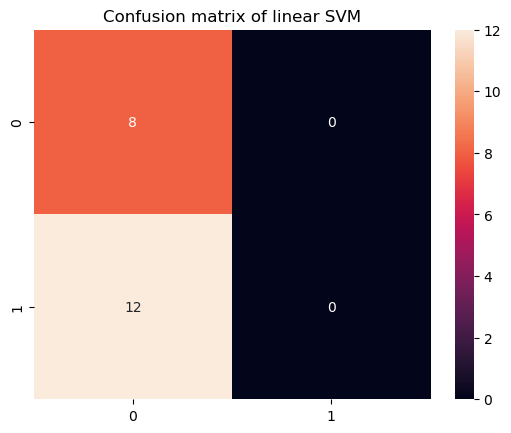

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test,y_pred_test)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of linear SVM') # fmt='d' formats the numbers as digits, which means integers

print(classification_report(y_test,y_pred_test))